In [15]:
import pandas as pd
import numpy as np
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import csv
from functools import reduce

In [19]:
#os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\usanews0")

df = pd.read_csv('Annotations/usanews0/usanews.csv')
df = df.fillna(0)

labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]

df_test = df[labels].astype("float").replace(r'^\s*$', np.nan, regex=True).fillna(0).replace(np.nan,0)

df.info()

df_test.drop(columns=['Others'], inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16683 entries, 0 to 16682
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16683 non-null  int64  
 1   message            16683 non-null  object 
 2   Direct Harassment  16683 non-null  float64
 3   Hate Speech        16683 non-null  float64
 4   Sexual Harassment  16683 non-null  float64
 5   Trolling           16683 non-null  float64
 6   Others             16683 non-null  float64
 7   Toxic              16683 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.270956           0.124237   
Hate Speech                 0.270956     1.000000           0.030260   
Sexual Harassment           0.124237     0.030260           1.000000   
Trolling                    0.125705     0.146777           0.015406   
Toxic                       0.247848     0.252308           0.066515   

                   Trolling     Toxic  
Direct Harassment  0.125705  0.247848  
Hate Speech        0.146777  0.252308  
Sexual Harassment  0.015406  0.066515  
Trolling           1.000000  0.102320  
Toxic              0.102320  1.000000  


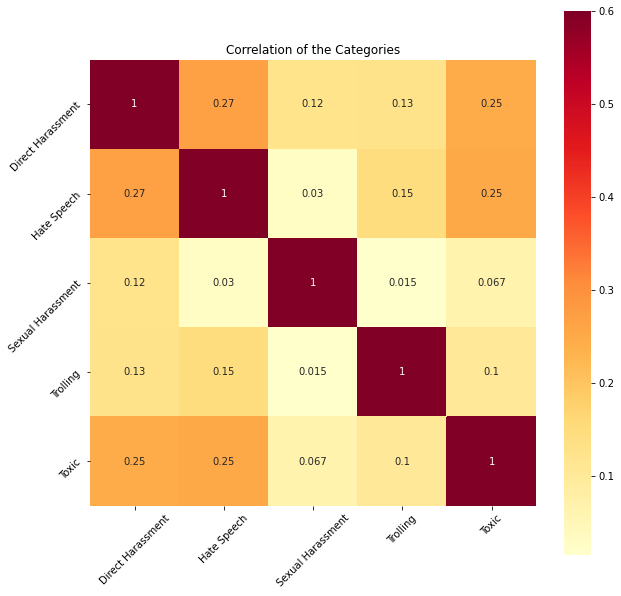

In [40]:
def heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    #df_corr = df.corr(method="pearson") #forlabels
    df_corr = df.corr(method="spearman")
    print(df_corr)
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()
    
heatmap(df_test, 'Correlation of the Categories')

,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
000,0.00000,0.003701,0.0,0.006389,0.033627,0.000000
10,0.00853,0.008767,0.0,0.000000,0.000000,0.000000
12,0.00000,0.005345,0.0,0.000000,0.000000,0.000000
127k,0.00000,0.000000,0.0,0.009228,0.000000,0.000000
13,0.00000,0.000000,0.0,0.009228,0.000000,0.000000
...,...,...,...,...,...,...
𝙃𝘼𝙎,0.00000,0.000000,0.0,0.000000,0.000000,0.018636
𝙃𝙀𝙍,0.00000,0.000000,0.0,0.000000,0.000000,0.009318
𝙅𝙄𝙕𝙕,0.00000,0.000000,0.0,0.000000,0.000000,0.009318
𝙅𝙊𝙀,0.00000,0.000000,0.0,0.000000,0.000000,0.009318


                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.172747           0.133477   
Hate Speech                 0.172747     1.000000           0.018188   
Sexual Harassment           0.133477     0.018188           1.000000   
Trolling                    0.090696    -0.010385          -0.007529   
Others                      0.228264     0.120284           0.014324   
Toxic                       0.220452     0.157765           0.105469   

                   Trolling    Others     Toxic  
Direct Harassment  0.090696  0.228264  0.220452  
Hate Speech       -0.010385  0.120284  0.157765  
Sexual Harassment -0.007529  0.014324  0.105469  
Trolling           1.000000  0.133698  0.029453  
Others             0.133698  1.000000  0.192143  
Toxic              0.029453  0.192143  1.000000  


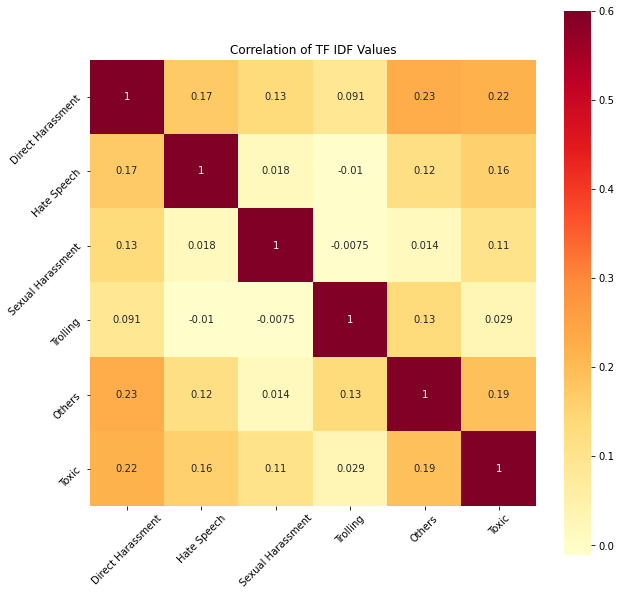

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_top_scores = {}
doc_per_label = {}
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', analyzer='word',
             min_df=1, lowercase=True, use_idf=True)

#combine messages as one document per category 
for label in labels:
    df_label = df.loc[df[label] == 1]
    if not df_label.empty:
       doc_per_label[label] = ' '.join(df_label['message'])
    else:
        doc_per_label[label] = ''

        
#get tfidf values 
vector = vectorizer.fit_transform(list(doc_per_label.values()))
features = np.array(vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(vector.todense(), columns=features, index=doc_per_label.keys())


#correlation of TF-IDF Values
heatmap(tfidf_df.T, "Correlation of TF IDF Values")


In [37]:
#get top 10 words per label 
top_words = []
print("TOP TFIDF SCORES FOR EACH LABEL")
for label in labels:
    #top 10 words per category
    TFIDF_top_scores[label] = pd.DataFrame(tfidf_df.T[label].sort_values().tail(10))
    #TFIDF_top_scores[label].columns = ["Word", "TF-IDF SCORE"]
#     TFIDF_top_scores[label].plot(kind='barh')
#     plt.title(label)
#     plt.show()
    for word in list(TFIDF_top_scores[label].index):
        top_words.append(word)
    display(TFIDF_top_scores[label])


TOP TFIDF SCORES FOR EACH LABEL


,Direct Harassment
harris,0.079944
vote,0.079944
obama,0.083120
kamala,0.095933
sucks,0.111921
2020,0.117251
china,0.127910
joe,0.244741
trump,0.253977
biden,0.803489


,Hate Speech
people,0.087634
ðÿ,0.093111
socialism,0.136361
democrats,0.145144
2020,0.156099
joe,0.175587
china,0.246472
vote,0.262903
trump,0.419986
biden,0.605065


,Sexual Harassment
makes,0.127559
biden,0.143167
wife,0.148857
porn,0.148857
women,0.148857
kameltoe,0.176315
joe,0.190890
gaga,0.286335
lady,0.429502
gag,0.440788


,Trolling
obama,0.065543
fake,0.065697
america,0.080374
news,0.093071
2020,0.132380
vote,0.137108
china,0.174931
joe,0.237592
trump,0.241688
biden,0.753739


,Others
america,0.099539
life,0.099539
china,0.124423
vote,0.124423
2020,0.124423
matter,0.124423
joe,0.129366
lives,0.144078
trump,0.474342
biden,0.474342


,Toxic
nancy,0.091692
china,0.100253
2020,0.100253
dothefive,0.122257
vote,0.133671
sucks,0.157540
žðÿ,0.160462
joe,0.206817
trump,0.322634
biden,0.723858


                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.852934           0.245000   
Hate Speech                 0.852934     1.000000          -0.001984   
Sexual Harassment           0.245000    -0.001984           1.000000   
Trolling                    0.928869     0.920213           0.134964   
Others                      0.879907     0.870168           0.136478   
Toxic                       0.827856     0.832447           0.213609   

                   Trolling    Others     Toxic  
Direct Harassment  0.928869  0.879907  0.827856  
Hate Speech        0.920213  0.870168  0.832447  
Sexual Harassment  0.134964  0.136478  0.213609  
Trolling           1.000000  0.889125  0.827717  
Others             0.889125  1.000000  0.791082  
Toxic              0.827717  0.791082  1.000000  


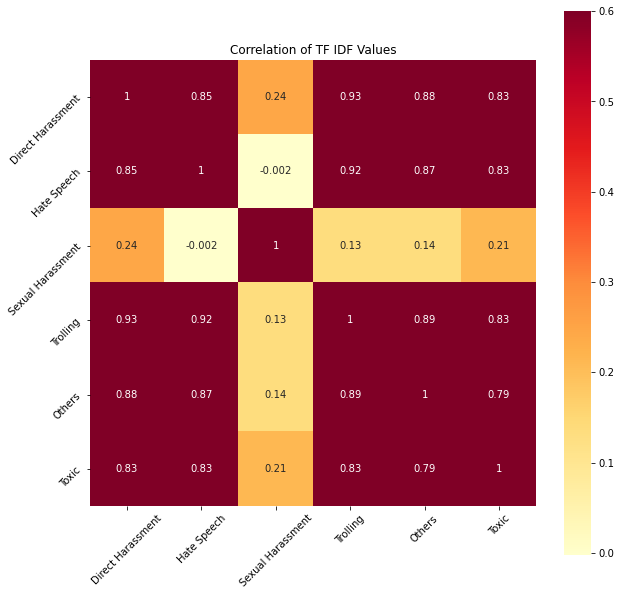

In [39]:

vector = vectorizer.fit_transform(list(doc_per_label.values()))
features = np.array(vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(vector.todense(), columns=features, index=doc_per_label.keys())


#correlation of TF-IDF Values
heatmap(tfidf_df[top_words].T.reset_index(), "Correlation of TF IDF Values")


# for label in labels:
#     top_words.extend(list(TFIDF_top_scores[label].index))
    

# top_tfidf_df = tfidf_df[top_words].T.reset_index()
# #display(top_tfidf_df)

# heatmap(top_tfidf_df, "Correlation of TF-IDF Values Top Words")